# Univariate regression between econ outcomes and mobility networks


In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import copy


Bad key text.latex.unicode in file /home/jtl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key text.latex.preview in file /home/jtl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 125 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/jtl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 157 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')


In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
import seaborn as sns

In [4]:
# read files
with open("../../data/02_intermediate/socioecon_boston_miami_chicago_ct_shp_dic.pickle", 'rb') as f:
    socioecon_shp_dic = pickle.load(f)

# hetero activity graphs    
with open("../../data/03_processed/A_home_activity_three_cities_unweighted_dic.pickle", 'rb') as f:
    A_home_unweighted_dic = pickle.load(f)


In [5]:
with open("../../data/03_processed/A_home_activity_three_cities_weighted_dic.pickle", 'rb') as f:
    A_home_weighted_dic = pickle.load(f)


In [6]:
# import lasso coefficients
with open('../../data/05_model_outputs/lasso_coefficients.pickle', 'rb') as f:
    coeff_dic = pickle.load(f)


In [7]:
# save location
fig_save_location = '../../../economic-strength-of-weak-mobility-ties-paper-/figs/'

In [8]:
socioecon_shp_dic.keys()

dict_keys(['boston', 'chicago', 'miami', 'total'])

In [9]:
A_home_unweighted_dic.keys()

dict_keys(['boston', 'chicago', 'miami'])

In [10]:
coeff_dic.keys()

dict_keys(['boston', 'chicago', 'miami', 'total', 'nyc'])

In [11]:
for col in socioecon_shp_dic['boston'].columns:
    print(col)

STATEFP
COUNTYFP
TRACTCE
NAME
NAMELSAD
MTFCC
FUNCSTAT
ALAND
AWATER
INTPTLAT
INTPTLON
geometry
pop_total_2018
sex_total_2018
sex_male_2018
sex_female_2018
age_median_2018
households_2018
race_total_2018
race_white_2018
race_black_2018
race_native_2018
race_asian_2018
inc_total_pop_2018
inc_no_pop_2018
inc_with_pop_2018
inc_pop_10k_2018
inc_pop_1k_15k_2018
inc_pop_15k_25k_2018
inc_pop_25k_35k_2018
inc_pop_35k_50k_2018
inc_pop_50k_65k_2018
inc_pop_65k_75k_2018
inc_pop_75k_2018
inc_median_ind_2018
travel_total_to_work_2018
travel_driving_to_work_2018
travel_pt_to_work_2018
travel_taxi_to_work_2018
travel_cycle_to_work_2018
travel_walk_to_work_2018
travel_work_from_home_2018
edu_total_pop_2018
bachelor_male_25_34_2018
master_phd_male_25_34_2018
bachelor_male_35_44_2018
master_phd_male_35_44_2018
bachelor_male_45_64_2018
master_phd_male_45_64_2018
bachelor_male_65_over_2018
master_phd_male_65_over_2018
bachelor_female_25_34_2018
master_phd_female_25_34_2018
bachelor_female_35_44_2018
master_

### Visualizing distributions of econ outcomes

- Boston income example.

In [12]:
city = 'boston'

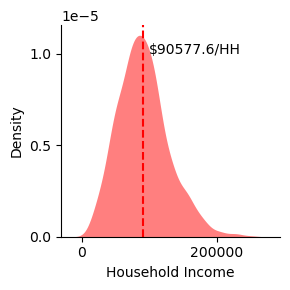

In [13]:
# income distribution
output = 'inc_median_household_2018'
data = socioecon_shp_dic[city]

plt.style.use("default")

fig, ax = plt.subplots(figsize = (3,3))

params = {
     'legend.fontsize': 20,
     'axes.labelsize': 20,
     'axes.titlesize': 30,
     'xtick.labelsize': 20,
     'ytick.labelsize': 20}
plt.rcParams.update(params)

ax = sns.kdeplot(
   data=data, x=output, 
   fill=True, common_norm=False, color = "r",
   alpha=0.5, linewidth=0,
)
ax.set_xlabel("Household Income")
ax.set_ylabel("Density")

mean_value = np.mean(data[output])
ax.axvline(x = mean_value, color = 'r', linestyle = '--')
ax.annotate("$"+str(np.round(mean_value, decimals = 1)) + "/HH", xy = (mean_value*1.1, 1e-5), size = 10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

fig.savefig(fig_save_location + "distribution_inc.png")

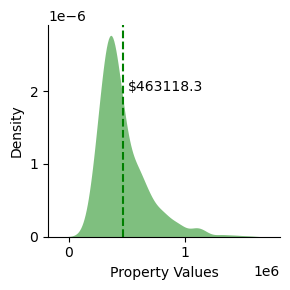

In [14]:
# property value distribution
output = 'property_value_median_2018'
data = socioecon_shp_dic[city]

plt.style.use("default")

fig, ax = plt.subplots(figsize = (3,3))

params = {
     'legend.fontsize': 20,
     'axes.labelsize': 20,
     'axes.titlesize': 30,
     'xtick.labelsize': 20,
     'ytick.labelsize': 20}
plt.rcParams.update(params)

ax = sns.kdeplot(
   data=data, x=output, 
   fill=True, common_norm=False, color = "g",
   alpha=0.5, linewidth=0,
)
ax.set_xlabel("Property Values")
ax.set_ylabel("Density")

# add mean value
mean_value = np.mean(data[output])
ax.axvline(x = mean_value, color = 'g', linestyle = '--')
ax.annotate("$"+str(np.round(mean_value, decimals = 1)), xy = (mean_value*1.1, 2e-6), size = 10)

# remove the box
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

fig.savefig(fig_save_location + "distribution_prop.png")


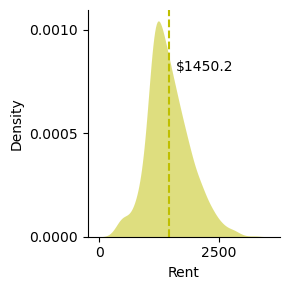

In [15]:
# property value distribution
output = 'rent_median_2018'
data = socioecon_shp_dic[city]

plt.style.use("default")

fig, ax = plt.subplots(figsize = (3,3))

params = {
     'legend.fontsize': 20,
     'axes.labelsize': 20,
     'axes.titlesize': 30,
     'xtick.labelsize': 20,
     'ytick.labelsize': 20}
plt.rcParams.update(params)

ax = sns.kdeplot(
   data=data, x=output, 
   fill=True, common_norm=False, color = "y",
   alpha=0.5, linewidth=0,
)
ax.set_xlabel("Rent")
ax.set_ylabel("Density")

mean_value = np.mean(data[output])
ax.axvline(x = mean_value, color = 'y', linestyle = '--')
ax.annotate("$"+str(np.round(mean_value, decimals = 1)), xy = (mean_value*1.1, 0.0008), size = 10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

fig.savefig(fig_save_location + "distribution_rent.png")

#### Univaraite regressions 

In [16]:
# create the aggregate counts
city = 'boston'
A_home_weighted_vector = pd.DataFrame(np.zeros((socioecon_shp_dic[city].shape[0], 1)), 
                                      index = socioecon_shp_dic[city].index,
                                      columns = ['counts'])
A_home_unweighted_vector = pd.DataFrame(np.zeros((socioecon_shp_dic[city].shape[0], 1)),
                                      index = socioecon_shp_dic[city].index,
                                      columns = ['counts'])

# add all the unweighted values
for activity in A_home_unweighted_dic[city][1.0].keys():
    A_home_unweighted_vector = A_home_unweighted_vector.add(pd.DataFrame(A_home_unweighted_dic[city][1.0][activity].sum(axis = 1), columns = ['counts']), fill_value = 0.0)

# add all the weighted values
for activity in A_home_weighted_dic[city].keys():
    A_home_weighted_vector = A_home_weighted_vector.add(pd.DataFrame(A_home_weighted_dic[city][activity].sum(axis = 1), columns = ['counts']), fill_value = 0.0)


In [17]:
# create the strong counts
activity = "Residential"
base_strong = pd.DataFrame(np.zeros((socioecon_shp_dic[city].shape[0], 1)),
                              index = socioecon_shp_dic[city].index,
                              columns = ['counts'])
base_strong = base_strong.add(pd.DataFrame(A_home_unweighted_dic[city][1.0][activity].sum(axis = 1), columns = ['counts']), fill_value = 0.0)


In [18]:
# create the weak coutns
activity = "French"
base_weak = pd.DataFrame(np.zeros((socioecon_shp_dic[city].shape[0], 1)),
                              index = socioecon_shp_dic[city].index,
                              columns = ['counts'])
base_weak = base_weak.add(pd.DataFrame(A_home_unweighted_dic[city][1.0][activity].sum(axis = 1), columns = ['counts']), fill_value = 0.0)


#### income ~

/home/jtl/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/jtl/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/jtl/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


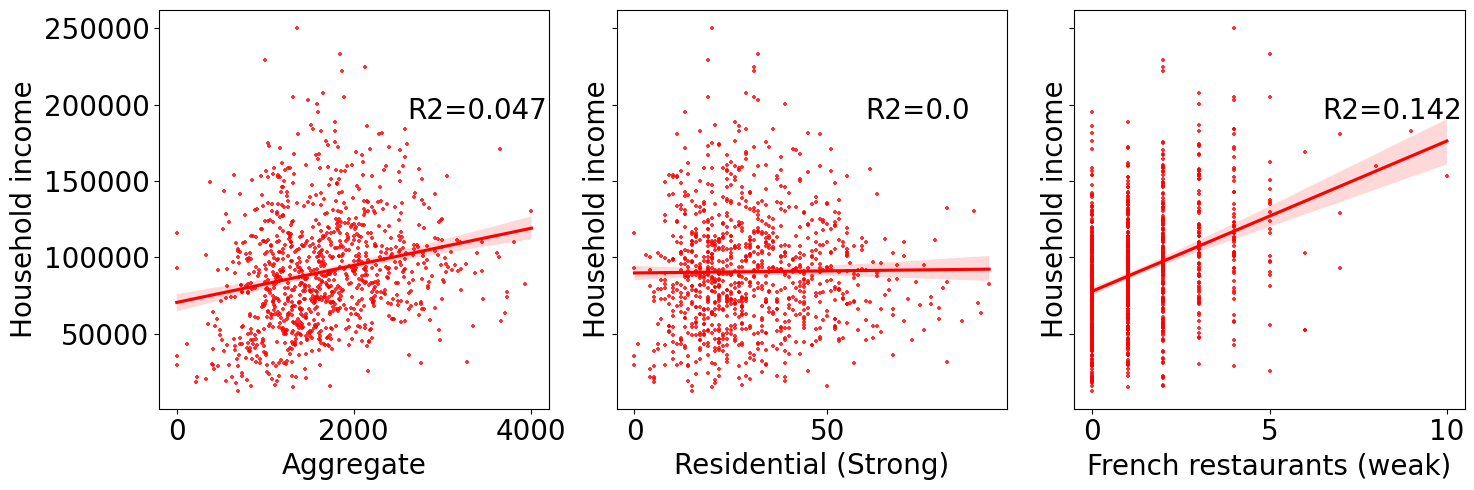

In [19]:
# iterate 
# output ~ input
city = 'boston'
output = 'inc_median_household_2018'
x_list = [A_home_unweighted_vector, base_strong, base_weak]
x_label_list = ['Aggregate', 'Residential (Strong)', 'French restaurants (weak)']
# fig_name_list = ['inc_agg.png', 'inc_strong.png', 'inc_weak.png']
fig_name = 'inc_mobility.png'
y_label = 'Household income'
color = 'r'

# 
fig, ax = plt.subplots(1, 3, sharey= 'all', figsize = (15,5))
plt.style.use("ggplot")

params = {
     'legend.fontsize': 20,
     'axes.labelsize': 20,
     'axes.titlesize': 30,
     'xtick.labelsize': 20,
     'ytick.labelsize': 20}
plt.rcParams.update(params)

for idx in range(3):
    x = x_list[idx]    
    y = socioecon_shp_dic[city][output]
    x_75_percentile = x.min() + 0.65 * (x.max() - x.min())
    y_75_percentile = y.min() + 0.75 * (y.max() - y.min())

    # 
    reg = LinearRegression().fit(x, y)
    r2_score = reg.score(x, y)

    sns.regplot(x, y, 
              marker = "+", ci = 95, color = color, scatter_kws={'s':5}, ax = ax[idx])  
#     ax[idx] = sns.regplot(x, y, 
#               marker = "+", ci = 95, color = 'r', scatter_kws={'s':5})
    ax[idx].annotate("R2=" + str(np.round(r2_score, decimals = 3)), xy=(x_75_percentile, y_75_percentile), xycoords = 'data',
                xytext=(x_75_percentile, y_75_percentile), textcoords = 'data', 
                size = 20)

    ax[idx].set_xlabel(x_label_list[idx])
    ax[idx].set_ylabel(y_label)

plt.tight_layout()
plt.show()

fig.savefig(fig_save_location + fig_name)


#### property values ~

/home/jtl/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/jtl/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/jtl/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


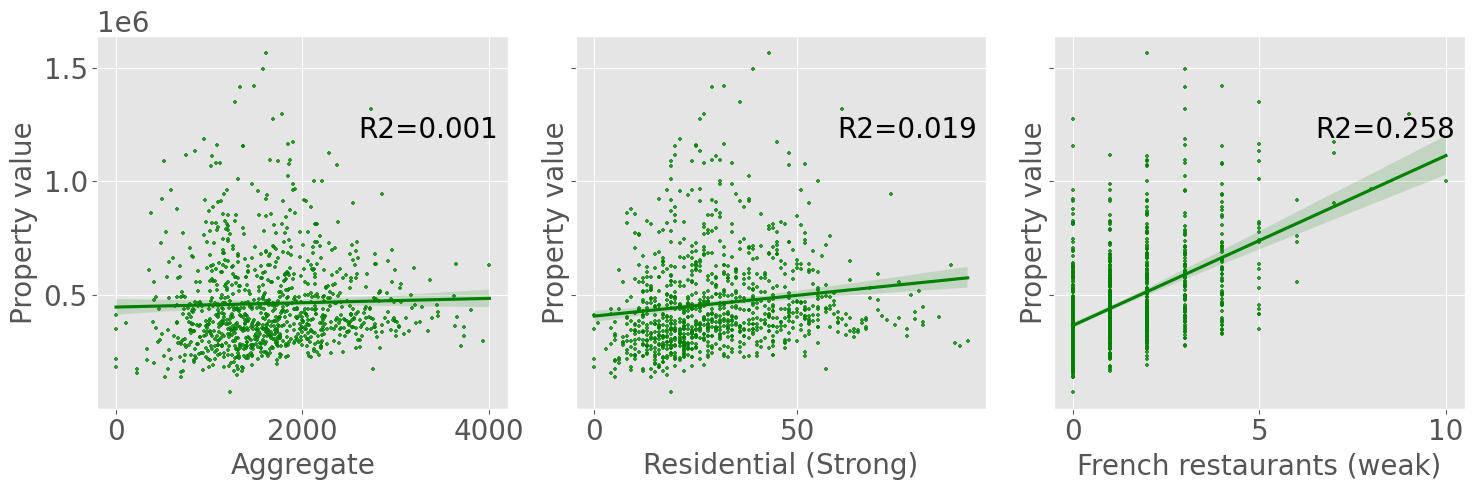

In [20]:
# iterate 
# output ~ input
city = 'boston'
output = 'property_value_median_2018'
x_list = [A_home_unweighted_vector, base_strong, base_weak]
x_label_list = ['Aggregate', 'Residential (Strong)', 'French restaurants (weak)']
# fig_name_list = ['inc_agg.png', 'inc_strong.png', 'inc_weak.png']
fig_name = 'prop_value_mobility.png'
y_label = 'Property value'
color = 'g'

# 
fig, ax = plt.subplots(1, 3, sharey= 'all', figsize = (15,5))
plt.style.use("ggplot")

params = {
     'legend.fontsize': 20,
     'axes.labelsize': 20,
     'axes.titlesize': 30,
     'xtick.labelsize': 20,
     'ytick.labelsize': 20}
plt.rcParams.update(params)

for idx in range(3):
    x = x_list[idx]    
    y = socioecon_shp_dic[city][output]
    x_75_percentile = x.min() + 0.65 * (x.max() - x.min())
    y_75_percentile = y.min() + 0.75 * (y.max() - y.min())

    # 
    reg = LinearRegression().fit(x, y)
    r2_score = reg.score(x, y)

    sns.regplot(x, y, 
              marker = "+", ci = 95, color = color, scatter_kws={'s':5}, ax = ax[idx])  
#     ax[idx] = sns.regplot(x, y, 
#               marker = "+", ci = 95, color = 'r', scatter_kws={'s':5})
    ax[idx].annotate("R2=" + str(np.round(r2_score, decimals = 3)), xy=(x_75_percentile, y_75_percentile), xycoords = 'data',
                xytext=(x_75_percentile, y_75_percentile), textcoords = 'data', 
                size = 20)

    ax[idx].set_xlabel(x_label_list[idx])
    ax[idx].set_ylabel(y_label)

plt.tight_layout()
plt.show()

fig.savefig(fig_save_location + fig_name)


#### rent

/home/jtl/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/jtl/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/jtl/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


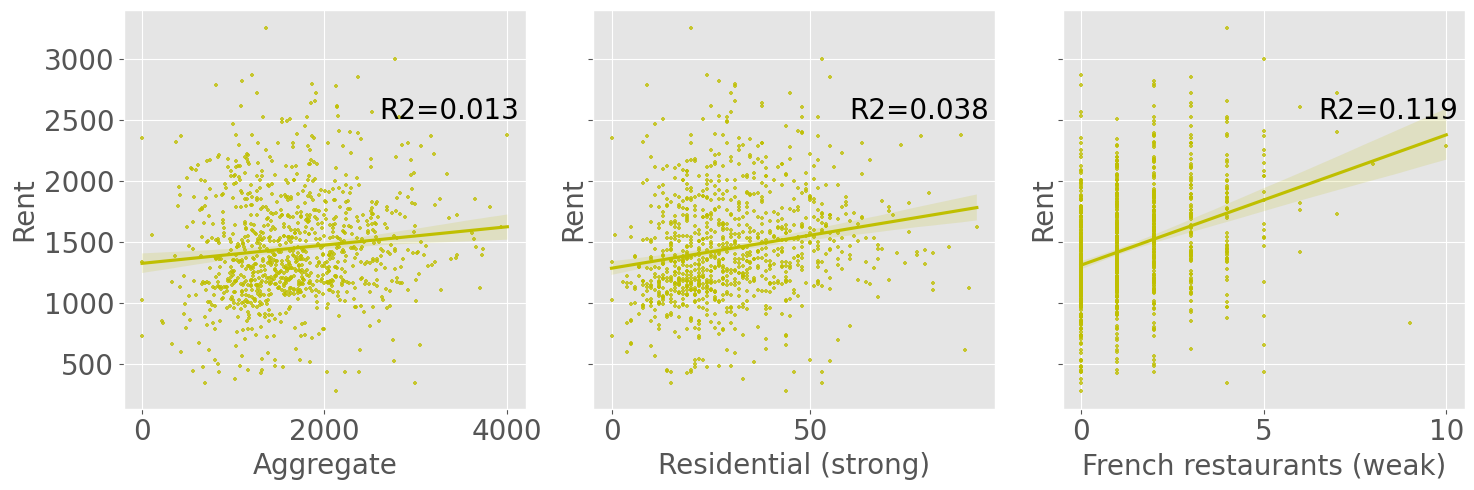

In [21]:
# iterate 
# output ~ input
city = 'boston'
output = 'rent_median_2018'
x_list = [A_home_unweighted_vector, base_strong, base_weak]
x_label_list = ['Aggregate', 'Residential (strong)', 'French restaurants (weak)']
# fig_name_list = ['inc_agg.png', 'inc_strong.png', 'inc_weak.png']
fig_name = 'rent_mobility.png'
y_label = 'Rent'
color = 'y'

# 
fig, ax = plt.subplots(1, 3, sharey= 'all', figsize = (15,5))
plt.style.use("ggplot")

params = {
     'legend.fontsize': 20,
     'axes.labelsize': 20,
     'axes.titlesize': 30,
     'xtick.labelsize': 20,
     'ytick.labelsize': 20}
plt.rcParams.update(params)

for idx in range(3):
    x = x_list[idx]    
    y = socioecon_shp_dic[city][output]
    x_75_percentile = x.min() + 0.65 * (x.max() - x.min())
    y_75_percentile = y.min() + 0.75 * (y.max() - y.min())

    # 
    reg = LinearRegression().fit(x, y)
    r2_score = reg.score(x, y)

    sns.regplot(x, y, 
              marker = "+", ci = 95, color = color, scatter_kws={'s':5}, ax = ax[idx])  
#     ax[idx] = sns.regplot(x, y, 
#               marker = "+", ci = 95, color = 'r', scatter_kws={'s':5})
    ax[idx].annotate("R2=" + str(np.round(r2_score, decimals = 3)), xy=(x_75_percentile, y_75_percentile), xycoords = 'data',
                xytext=(x_75_percentile, y_75_percentile), textcoords = 'data', 
                size = 20)

    ax[idx].set_xlabel(x_label_list[idx])
    ax[idx].set_ylabel(y_label)

plt.tight_layout()
plt.show()

fig.savefig(fig_save_location + fig_name)